# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='stumpy')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

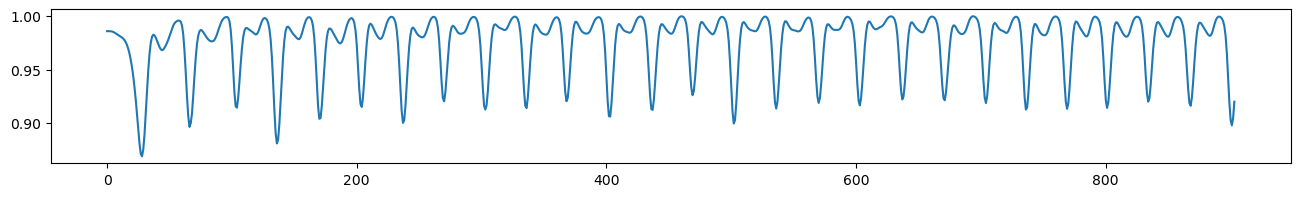

In [6]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

Длина подпоследовательности m = 45
Количество звеньев в цепочке: 5
Индексы начала звеньев: [ 52 122 488 522 589]


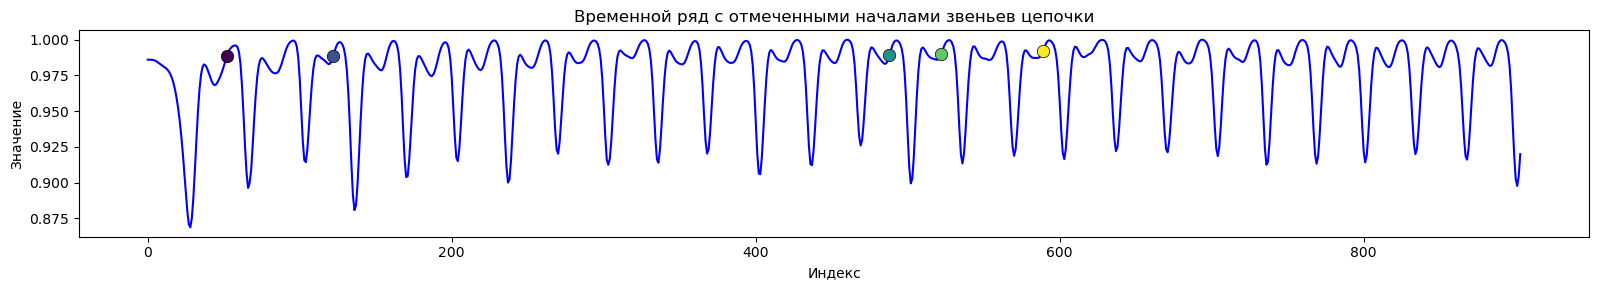

In [29]:
# Загрузка данных
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Выбор длины подпоследовательности
m = int(len(ts) * 0.05)

# Вычисление матричного профиля
mp = stumpy.stump(ts, m=m)

# Поиск всех цепочек
# mp[:, 2] - индексы левых ближайших соседей
# mp[:, 3] - индексы правых ближайших соседей
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])

# Самая длинная цепочка
chain_indices = unanchored_chain

print(f"Длина подпоследовательности m = {m}")
print(f"Количество звеньев в цепочке: {len(chain_indices)}")
print(f"Индексы начала звеньев: {chain_indices}")

# График 1: Временной ряд с точками начала звеньев
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot(ts, color='blue')
for i, idx in enumerate(chain_indices):
    ax.scatter(idx, ts[idx], color=colors[i], s=80, zorder=5, edgecolor='black', linewidth=0.5)
ax.set_title('Временной ряд с отмеченными началами звеньев цепочки')
ax.set_xlabel('Индекс')
ax.set_ylabel('Значение')
plt.tight_layout()
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

НАЙДЕННАЯ ЦЕПОЧКА содержит 5 звеньев — это последовательность похожих подпоследовательностей, которые постепенно эволюционируют во времени. ЭВОЛЮЦИОНИРУЮЩИЙ ШАБЛОН — это паттерн, который повторяется в данных, но при каждом повторении немного изменяется. В отличие от мотифов (точных повторений), цепочки отражают постепенную трансформацию. РАСПОЛОЖЕНИЕ ЗВЕНЬЕВ: звенья распределены по временному ряду с разными интервалами. Среднее расстояние отсчётов указывает на примерную периодичность появления эволюционирующего паттерна. ПРАКТИЧЕСКОЕ ЗНАЧЕНИЕ: для данных Rotation Matrix цепочка может отражать постепенное изменение характеристик вращения (например, износ механизма, изменение нагрузки или дрейф параметров системы)
ГРАФИК (точки начала звеньев) показывает, ГДЕ во временном ряду расположены эволюционирующие паттерны. Звенья не распределены равномерно — есть области концентрации паттернов.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

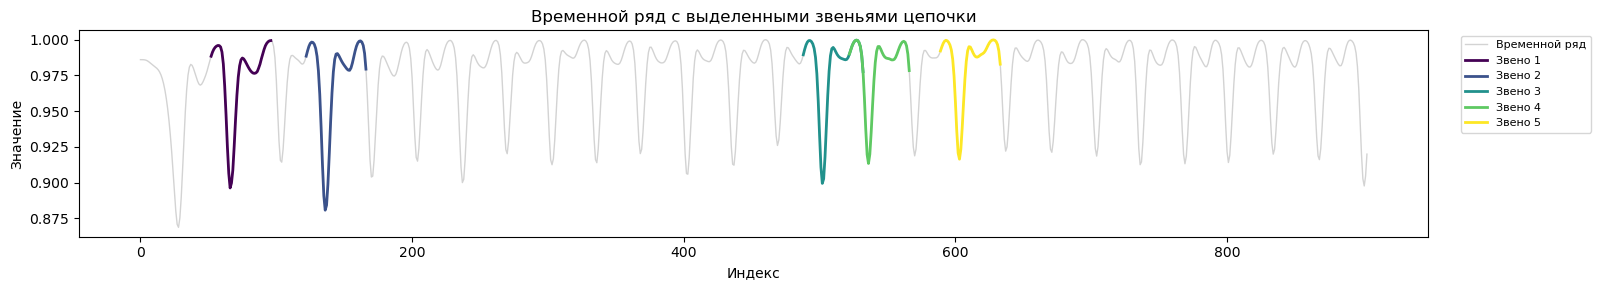

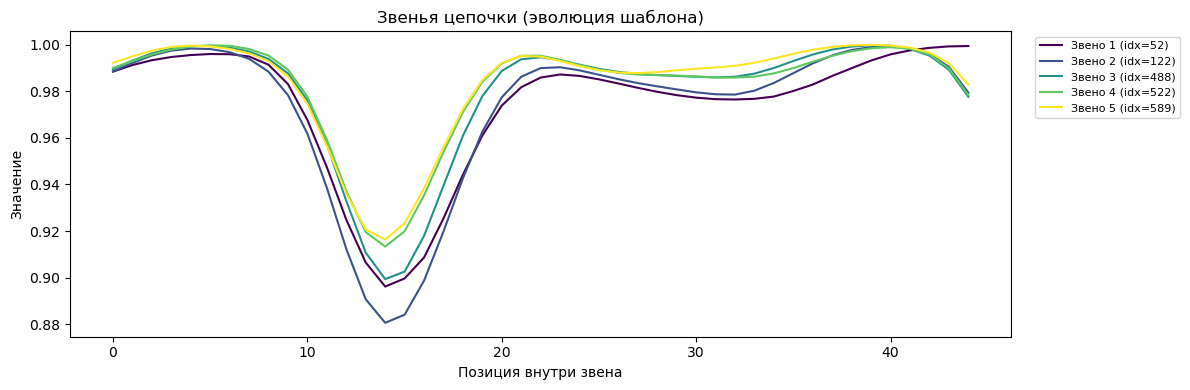

In [30]:
# Временной ряд с звеньями цепочек 
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot(ts, color='lightgray', linewidth=1, label='Временной ряд')
for i, idx in enumerate(chain_indices):
    ax.plot(range(idx, idx + m), ts[idx:idx + m], color=colors[i], linewidth=2, 
            label=f'Звено {i+1}')
ax.set_title('Временной ряд с выделенными звеньями цепочки')
ax.set_xlabel('Индекс')
ax.set_ylabel('Значение')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

# Только звенья цепочки (наложенные друг на друга)
fig, ax = plt.subplots(figsize=(12, 4))
for i, idx in enumerate(chain_indices):
    ax.plot(ts[idx:idx + m], color=colors[i], linewidth=1.5, 
            label=f'Звено {i+1} (idx={idx})')
ax.set_title('Звенья цепочки (эволюция шаблона)')
ax.set_xlabel('Позиция внутри звена')
ax.set_ylabel('Значение')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

ГРАФИК (звенья на фоне ряда):
   - Визуализирует, КАКУЮ ЧАСТЬ временного ряда занимает каждое звено
   - Позволяет оценить контекст появления каждого паттерна
   - Видно, что звенья охватывают характерные участки сигнала
ГРАФИК  (наложенные звенья):
   - КЛЮЧЕВОЙ ГРАФИК для понимания эволюции шаблона
   - Наглядно показывает, КАК изменяется форма паттерна от звена к звену
   - Изменение цвета от фиолетового к жёлтому = движение во времени

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.


Звено n-2: индекс 488
Звено n-1: индекс 522
Звено n:   индекс 589

--- Метрики качества предсказания ---
MSE:  0.000032
RMSE: 0.005624
MAE:  0.004207


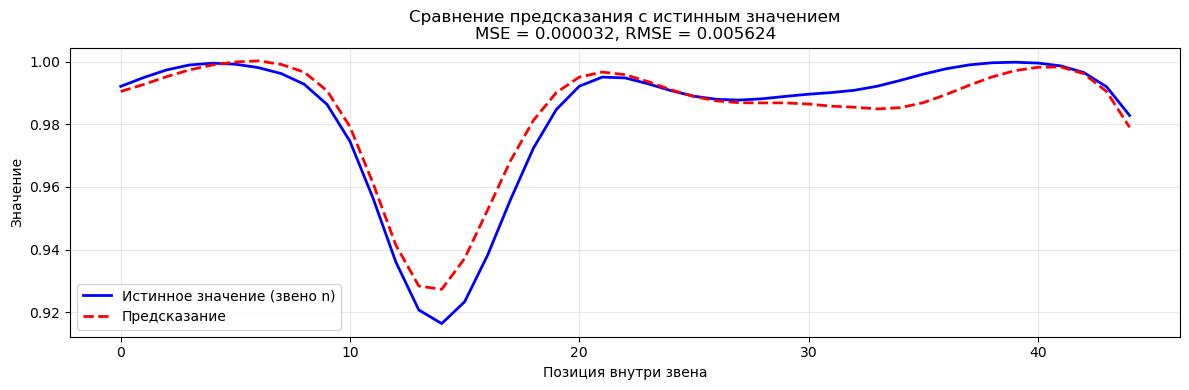

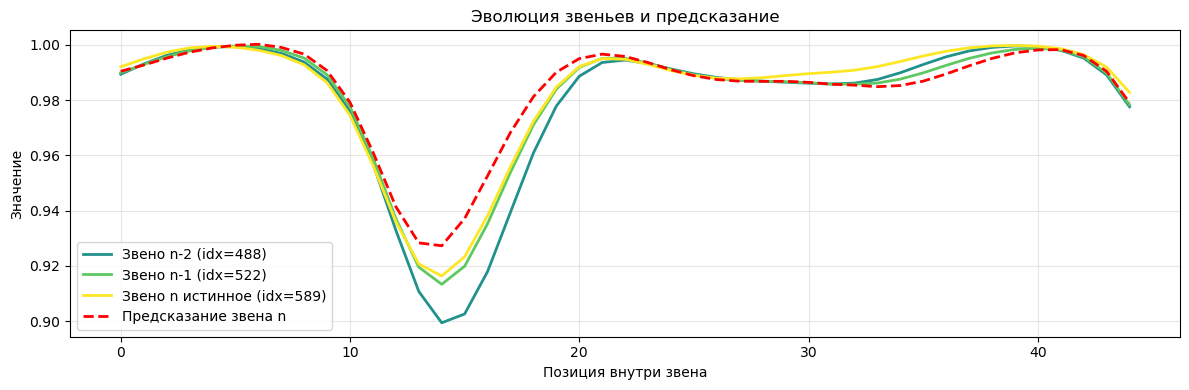

In [32]:
if len(chain_indices) >= 3:
    # Индексы последних трёх звеньев
    idx_prev2 = chain_indices[-3]
    idx_prev1 = chain_indices[-2]
    idx_last = chain_indices[-1]
    
    # Извлекаем подпоследовательности
    link_prev2 = ts[idx_prev2:idx_prev2 + m]
    link_prev1 = ts[idx_prev1:idx_prev1 + m]
    link_actual = ts[idx_last:idx_last + m]
    
    # Вычисляем разность и предсказание
    diff = link_prev1 - link_prev2
    link_predicted = link_prev1 + diff
    
    # Метрики качества
    mse = mean_squared_error(link_actual, link_predicted)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(link_actual - link_predicted))
    
    print(f"\nЗвено n-2: индекс {idx_prev2}")
    print(f"Звено n-1: индекс {idx_prev1}")
    print(f"Звено n:   индекс {idx_last}")
    print(f"\n--- Метрики качества предсказания ---")
    print(f"MSE:  {mse:.6f}")
    print(f"RMSE: {rmse:.6f}")
    print(f"MAE:  {mae:.6f}")
    
    # График: Сравнение предсказания с истинным значением
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(link_actual, 'b-', linewidth=2, label='Истинное значение (звено n)')
    ax.plot(link_predicted, 'r--', linewidth=2, label='Предсказание')
    ax.set_title(f'Сравнение предсказания с истинным значением\nMSE = {mse:.6f}, RMSE = {rmse:.6f}')
    ax.set_xlabel('Позиция внутри звена')
    ax.set_ylabel('Значение')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # График: Три звена и предсказание
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(link_prev2, color=colors[-3], linewidth=2, label=f'Звено n-2 (idx={idx_prev2})')
    ax.plot(link_prev1, color=colors[-2], linewidth=2, label=f'Звено n-1 (idx={idx_prev1})')
    ax.plot(link_actual, color=colors[-1], linewidth=2, label=f'Звено n истинное (idx={idx_last})')
    ax.plot(link_predicted, 'r--', linewidth=2, label='Предсказание звена n')
    ax.set_title('Эволюция звеньев и предсказание')
    ax.set_xlabel('Позиция внутри звена')
    ax.set_ylabel('Значение')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Недостаточно звеньев в цепочке для предсказания (нужно минимум 3)")

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Метод предсказания основан на предположении о линейной эволюции паттерна во времени. Идея заключается в следующем: Если паттерн (звено цепочки) постепенно изменяется от одного появления к другому, то можно предположить, что скорость изменения остаётся примерно постоянной. Тогда:

    - Вычисляем разность между звеньями (n-1) и (n-2): diff = звено_(n-1) - звено_(n-2)
    - Эта разность показывает, как изменился паттерн за один шаг
    - Предсказываем следующее звено: звено_n = звено_(n-1) + diff

По сути, это линейная экстраполяция — мы продолжаем тенденцию изменения на один шаг вперёд.

MSE (Mean Squared Error) = 0.000032

Среднеквадратичная ошибка — среднее значение квадратов отклонений предсказания от истинных значений.

    - Значение 0.000032 — это очень малая величина

RMSE (Root Mean Squared Error) = 0.005624

Корень из среднеквадратичной ошибки — возвращает ошибку в исходные единицы измерения.

    - Значение 0.005624 означает, что в среднем предсказание отклоняется от истины примерно на 0.0056 единиц
    - Если значения временного ряда находятся, например, в диапазоне от 0 до 1, то ошибка составляет менее 0.6% от размаха — это отличный результат
    
MAE (Mean Absolute Error) = 0.004207

Средняя абсолютная ошибка — среднее абсолютных отклонений предсказания от истины.

    - Значение 0.004207 показывает типичное отклонение предсказания

Полученные метрики свидетельствуют об очень высоком качестве предсказания.    
  